In [163]:
import numpy as np # 导入numpy包
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [170]:
class Perceptron(object):
    # 初始化对象
    def __init__(self, eta=0.01, n_iter=100):
        self.eta=eta
        self.n_iter=n_iter
    
    # 训练模型
    def train(self, X,Y):
        # 随机初始权重
        self.W = np.random.random(1+X.shape[1])
        # X = np.hstack((np.ones(shape=(X.shape[0],1)), X))
        for _ in range(self.n_iter):
            for tranX, labelY in zip(X,Y):
                # 计算梯度
                dtW = self.eta * (labelY - self.predict(tranX)) * np.hstack((1, tranX))
                self.W += dtW
    # 预测模型    
    def predict(self,tranX):
        tranX = np.hstack((1, tranX))
        return np.sign(np.dot(tranX, self.W.T))
        #return np.where(np.dot(tranX, self.W.T)>=0.0,1,-1)
    
    def plotRes(self,X,Y):
        '''
            因为期望输出的值为（1或者-1）
            即：w0+w1x1+······+wnxn>0或w0+w1x1+······+wnxn<0
            所以它们的分界线为：
            w0+w1x1+······+wnxn=0
            二维时为：
            w0+w1x1+w2x2=0
            w2x2=-w1x1-w0
            x2=-(w1/w2)x1-w0/w2
            x2=kx1+b
        '''
        k=-self.W[1]/self.W[2]
        d=-self.W[0]/self.W[2]
        print('k=',k)
        print('d=',d)
        xdata=np.linspace(np.min(X),np.max(X))
        plt.figure()
        plt.plot(xdata,xdata*k+d)
        plt.plot(X[np.where(Y==1),0],X[np.where(Y==1),1], 'go')
        plt.plot(X[np.where(Y==-1),0],X[np.where(Y==-1),1], 'ro')
        plt.show()

In [194]:
#定义坐标,设定6组输入数据，每组为（x1,x2）
X=np.array([[4,3],
            [5,4],
            [4,5],
            [1,1],
            [2,1],
            [3,2]])
#设定输入向量的期待输出值
Y=np.array([1,1,1,-1,-1,-1])

X1 = np.random.randint(0,10, size=(20,2))
X2 = np.random.randint(5,20, size=(20,2))
X = np.vstack((X1,X2))
Label = np.hstack((np.ones(20), -np.ones(20)))

#训练集和测试集划分
X_train,X_test,y_train,y_test=train_test_split(X,Label,test_size=0.3,random_state=0)

k= -0.41955796198164397
d= 13.237961273248956


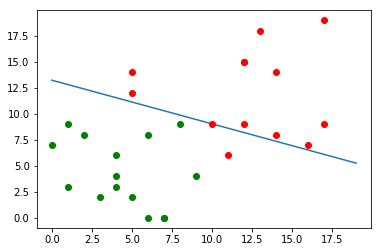

In [209]:
pe = Perceptron(n_iter=500)
pe.train(X_train,y_train)
pe.plotRes(X_train,y_train)

k= -0.41955796198164397
d= 13.237961273248956


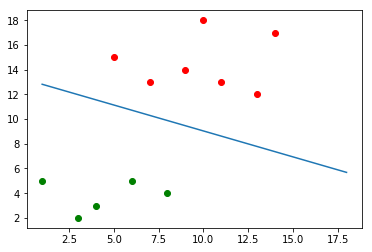

In [210]:
pe.plotRes(X_test,y_test)

In [217]:
truenumber = 0.
for x,y in zip(X_test, y_test):
    if pe.predict(x)==y:
        truenumber += 1
print('精度：',truenumber/len(y_test))

精度： 1.0
